In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """Returns relative error."""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
#Load data
data = get_CIFAR10_data()
for k, v in data.items():
    print("%s: " % k, v.shape)

x_test:  (1000, 3, 32, 32)
y_test:  (1000,)
y_train:  (49000,)
x_train:  (49000, 3, 32, 32)
x_val:  (1000, 3, 32, 32)
y_val:  (1000,)


In [4]:
from cs231n.classifiers.fc_net import *

# Affine layer: forward

In [4]:
# Test the affine_forward function

num_inputs = 2 
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
x = np.linspace(-0.1, 0.5, num = input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num = weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num = output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[1.49834967, 1.70660132, 1.91485297], 
                       [3.25553199, 3.5141327, 3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print('Testing affine_forward function:')
print('difference:', rel_error(out, correct_out))

Testing affine_forward function:
difference: 9.76984946819e-10


# Affine layer: backward

In [5]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  1.18859613724e-10
dw error:  1.62209474861e-10
db error:  5.9776403515e-12


# ReLU layer:  forward

In [6]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num = 12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[0.,         0.,         0.,         0.        ], 
                        [0.,         0.,         0.04545455, 0.13636364], 
                        [0.22727273, 0.31818182, 0.40909091, 0.5       ]])

# Compare your output with ours. The error should be around 1e-8.
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.99999979802e-08


# ReLU layer: backward

In [7]:
# Test the relu_backward function

x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12.
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.27559421728e-12


# "Sandwich" layers

In [8]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward:
dx error:  1.00466345325e-10
dw error:  1.85395981577e-10
db error:  3.2756156739e-12


# Loss layers: Softmax and SVM

In [9]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size = num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose = False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be 1e-9.
print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose = False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8.
print('\nTesting softmax:')
print('loss: ', loss)
print('dx_error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  9.00061731495
dx error:  1.40215660067e-09

Testing softmax:
loss:  2.30264726285
dx_error:  7.73063380278e-09


# Two-layer network

In [10]:
N, D, H, C = 3, 5, 50, 7
x = np.random.randn(N, D)
Y = np.random.randint(C, size = N)

std = 1e-2
model = TwoLayerNet(input_dim = D, hidden_dim = H, num_classes = C, weight_scale = std)

print('Testing initialization ...')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right.'
assert np.all(b1 == 0), 'First layer biases do not seem right.'
assert W2_std < std / 10, 'Second layer weights do not seem right.'
assert np.all(b2 == 0), 'Second layer biases do not seem right.'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num = D * H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num = H)
model.params['W2'] = np.linspace(-0.3, 0.4, num = H * C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num = C)

x = np.linspace(-5.5, 4.5, num = N * D).reshape(D, N).T
scores = model.loss(x)
correct_scores = np.asarray([[11.53165108, 12.2917344,  13.05181771, 13.81190102, 14.57198434, 15.33206765, 16.09215096], 
                             [12.05769098, 12.74614105, 13.43459113, 14.1230412,  14.81149128, 15.49994135, 16.18839143], 
                             [12.58373087, 13.20054771, 13.81736455, 14.43418138, 15.05099822, 15.66781506, 16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass.'

print('Testing trainingloss (no relularization).')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(x, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss.'

for reg in [0.0, 0.7]:
    print('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(x, y)
    
    for name in sorted(grads):
        f = lambda _: model.loss(x, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose = False)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ...
Testing test-time forward pass ... 
Testing trainingloss (no relularization).
Running numeric gradient check with reg =  0.0
W1 relative error: 1.83e-08
W2 relative error: 3.20e-10
b1 relative error: 9.83e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.56e-08
b2 relative error: 9.09e-10


# Solver

In [11]:
model = TwoLayerNet(hidden_dim = 200)
solver = Solver(model, data, update_rule = 'sgd', 
               optim_config = {'learning_rate': 1e-3}, 
               lr_decay = 0.99, num_epochs = 50, batch_size = 100, print_every = 100)
solver.train()


(Iteration 1 / 24500) loss: 2.305272
(Epoch 0 /50) train acc: 0.119000; val_acc: 0.139000
(Iteration 101 / 24500) loss: 1.900310
(Iteration 201 / 24500) loss: 1.645448
(Iteration 301 / 24500) loss: 1.601070
(Iteration 401 / 24500) loss: 1.433868
(Epoch 1 /50) train acc: 0.468000; val_acc: 0.441000
(Iteration 501 / 24500) loss: 1.586682
(Iteration 601 / 24500) loss: 1.435381
(Iteration 701 / 24500) loss: 1.473685
(Iteration 801 / 24500) loss: 1.394109
(Iteration 901 / 24500) loss: 1.674281
(Epoch 2 /50) train acc: 0.502000; val_acc: 0.481000
(Iteration 1001 / 24500) loss: 1.599235
(Iteration 1101 / 24500) loss: 1.539632
(Iteration 1201 / 24500) loss: 1.280792
(Iteration 1301 / 24500) loss: 1.464020
(Iteration 1401 / 24500) loss: 1.525041
(Epoch 3 /50) train acc: 0.554000; val_acc: 0.484000
(Iteration 1501 / 24500) loss: 1.492161
(Iteration 1601 / 24500) loss: 1.410089
(Iteration 1701 / 24500) loss: 1.360904
(Iteration 1801 / 24500) loss: 1.382884
(Iteration 1901 / 24500) loss: 1.444038


(Iteration 16001 / 24500) loss: 0.538098
(Iteration 16101 / 24500) loss: 0.735128
(Epoch 33 /50) train acc: 0.756000; val_acc: 0.513000
(Iteration 16201 / 24500) loss: 0.576937
(Iteration 16301 / 24500) loss: 0.577554
(Iteration 16401 / 24500) loss: 0.486825
(Iteration 16501 / 24500) loss: 0.546492
(Iteration 16601 / 24500) loss: 0.965208
(Epoch 34 /50) train acc: 0.772000; val_acc: 0.497000
(Iteration 16701 / 24500) loss: 0.402886
(Iteration 16801 / 24500) loss: 0.693431
(Iteration 16901 / 24500) loss: 0.788436
(Iteration 17001 / 24500) loss: 0.984637
(Iteration 17101 / 24500) loss: 0.543485
(Epoch 35 /50) train acc: 0.806000; val_acc: 0.519000
(Iteration 17201 / 24500) loss: 0.461772
(Iteration 17301 / 24500) loss: 0.507665
(Iteration 17401 / 24500) loss: 0.560603
(Iteration 17501 / 24500) loss: 0.520242
(Iteration 17601 / 24500) loss: 0.706720
(Epoch 36 /50) train acc: 0.803000; val_acc: 0.499000
(Iteration 17701 / 24500) loss: 0.726885
(Iteration 17801 / 24500) loss: 0.779757
(Iter

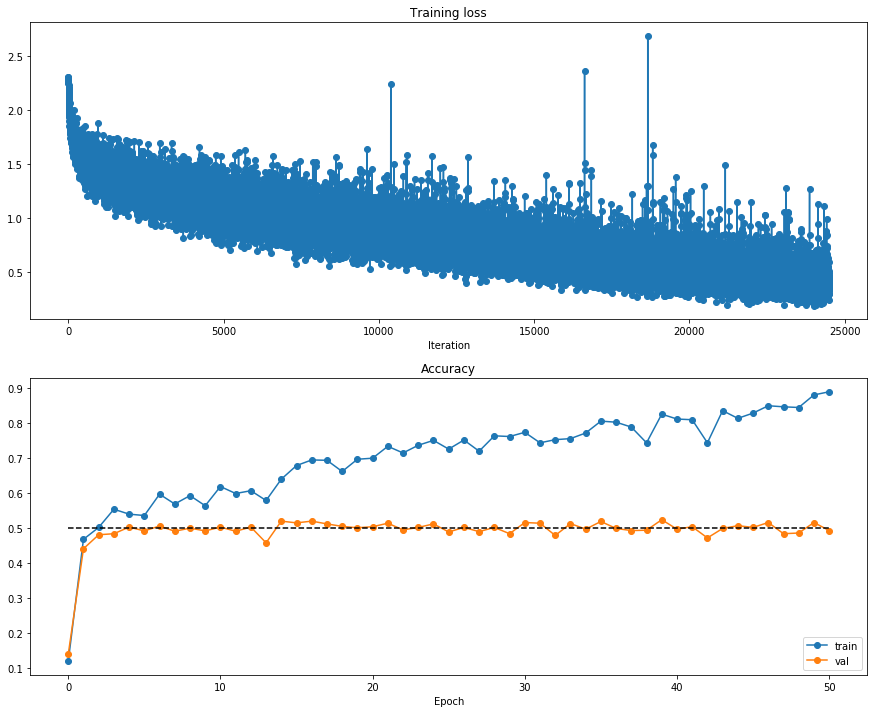

In [12]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label = 'train')
plt.plot(solver.val_acc_history, '-o', label = 'val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network

## Initial loss and gradient check

In [13]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
x = np.random.randn(N, D)
y = np.random.randint(C, size = (N, ))

for reg in [0.0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet([H1, H2], input_dim = D, num_classes = C, reg = reg, 
                              weight_scale = 5e-2, dtype = np.float64)
    
    loss, grads = model.loss(x, y)
    print('Initial loss: ', loss)
    
    for name in sorted(grads):
        f = lambda _: model.loss(x, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose = False, h = 1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0.0
Initial loss:  2.3050603393
W1 relative error: 1.27e-05
W2 relative error: 5.92e-07
W3 relative error: 2.52e-06
b1 relative error: 8.02e-07
b2 relative error: 2.20e-08
b3 relative error: 1.55e-10
Running check with reg =  3.14
Initial loss:  7.22104709317
W1 relative error: 5.60e-08
W2 relative error: 3.75e-07
W3 relative error: 1.23e-07
b1 relative error: 6.66e-08
b2 relative error: 2.81e-09
b3 relative error: 2.26e-10


(Iteration 1 / 40) loss: 2.381010
(Epoch 0 /20) train acc: 0.280000; val_acc: 0.111000
(Epoch 1 /20) train acc: 0.280000; val_acc: 0.122000
(Epoch 2 /20) train acc: 0.320000; val_acc: 0.142000
(Epoch 3 /20) train acc: 0.360000; val_acc: 0.109000
(Epoch 4 /20) train acc: 0.560000; val_acc: 0.164000
(Epoch 5 /20) train acc: 0.660000; val_acc: 0.187000
(Iteration 11 / 40) loss: 1.189210
(Epoch 6 /20) train acc: 0.840000; val_acc: 0.177000
(Epoch 7 /20) train acc: 0.840000; val_acc: 0.147000
(Epoch 8 /20) train acc: 0.840000; val_acc: 0.193000
(Epoch 9 /20) train acc: 0.940000; val_acc: 0.210000
(Epoch 10 /20) train acc: 0.860000; val_acc: 0.171000
(Iteration 21 / 40) loss: 0.379493
(Epoch 11 /20) train acc: 0.940000; val_acc: 0.170000
(Epoch 12 /20) train acc: 1.000000; val_acc: 0.215000
(Epoch 13 /20) train acc: 1.000000; val_acc: 0.201000
(Epoch 14 /20) train acc: 0.980000; val_acc: 0.185000
(Epoch 15 /20) train acc: 1.000000; val_acc: 0.196000
(Iteration 31 / 40) loss: 0.074343
(Epoch 

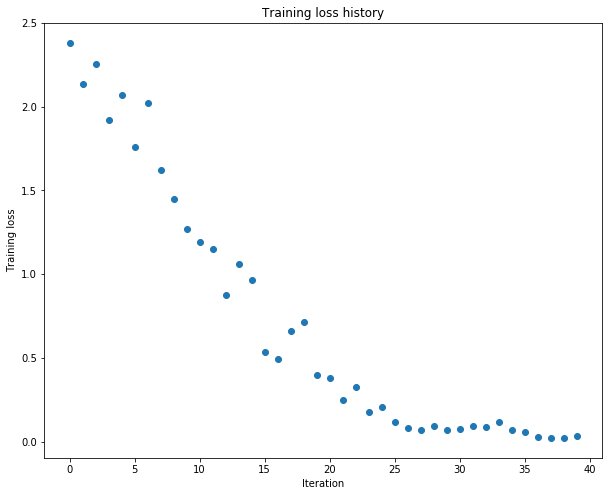

In [14]:
# Use a three-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
    'x_train': data['x_train'][:num_train], 
    'y_train': data['y_train'][:num_train], 
    'x_val': data['x_val'], 
    'y_val': data['y_val']
}

weight_scale = 1e-2
learning_rate = 1e-2
model = FullyConnectedNet([100, 100], weight_scale = weight_scale, dtype = np.float64)
solver = Solver(model, small_data, print_every = 10, num_epochs = 20, batch_size = 25, update_rule = 'sgd', 
               optim_config = {'learning_rate': learning_rate})
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

(Iteration 1 / 40) loss: 75.414376
(Epoch 0 /20) train acc: 0.220000; val_acc: 0.094000
(Epoch 1 /20) train acc: 0.320000; val_acc: 0.126000
(Epoch 2 /20) train acc: 0.480000; val_acc: 0.105000
(Epoch 3 /20) train acc: 0.520000; val_acc: 0.112000
(Epoch 4 /20) train acc: 0.760000; val_acc: 0.093000
(Epoch 5 /20) train acc: 0.840000; val_acc: 0.117000
(Iteration 11 / 40) loss: 2.717480
(Epoch 6 /20) train acc: 0.960000; val_acc: 0.116000
(Epoch 7 /20) train acc: 0.960000; val_acc: 0.116000
(Epoch 8 /20) train acc: 0.980000; val_acc: 0.110000
(Epoch 9 /20) train acc: 0.980000; val_acc: 0.110000
(Epoch 10 /20) train acc: 1.000000; val_acc: 0.104000
(Iteration 21 / 40) loss: 0.000065
(Epoch 11 /20) train acc: 1.000000; val_acc: 0.104000
(Epoch 12 /20) train acc: 1.000000; val_acc: 0.104000
(Epoch 13 /20) train acc: 1.000000; val_acc: 0.104000
(Epoch 14 /20) train acc: 1.000000; val_acc: 0.104000
(Epoch 15 /20) train acc: 1.000000; val_acc: 0.104000
(Iteration 31 / 40) loss: 0.000248
(Epoch

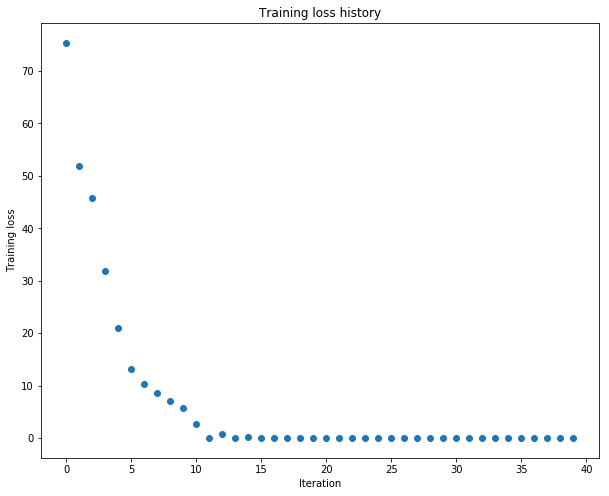

In [15]:
# Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
    'x_train': data['x_train'][:num_train], 
    'y_train': data['y_train'][:num_train], 
    'x_val': data['x_val'], 
    'y_val': data['y_val']
}

weight_scale = 1e-1
learning_rate = 5e-4
model = FullyConnectedNet([100, 100, 100, 100], weight_scale = weight_scale, dtype = np.float64)
solver = Solver(model, small_data, print_every = 10, num_epochs = 20, batch_size = 25, update_rule = 'sgd', 
               optim_config = {'learning_rate': learning_rate})
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# Update rules

## SGD + Momentum

In [16]:
from cs231n.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num = N * D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num = N * D).reshape(N, D)
v = np.linspace(0.6, 0.9, num = N * D).reshape(N, D)
config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config = config)
expected_next_w = np.asarray([
    [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
    [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
    [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
    [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
    [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
    [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
    [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
    [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config['velocity']))

next_w error:  8.88234703351e-09
velocity error:  4.26928774328e-09


running with  sgd
(Iteration 1 / 200) loss: 2.520022
(Epoch 0 /5) train acc: 0.096000; val_acc: 0.085000
(Iteration 11 / 200) loss: 2.193551
(Iteration 21 / 200) loss: 2.113729
(Iteration 31 / 200) loss: 2.069072
(Epoch 1 /5) train acc: 0.270000; val_acc: 0.249000
(Iteration 41 / 200) loss: 2.131085
(Iteration 51 / 200) loss: 1.949596
(Iteration 61 / 200) loss: 1.852932
(Iteration 71 / 200) loss: 1.908933
(Epoch 2 /5) train acc: 0.360000; val_acc: 0.283000
(Iteration 81 / 200) loss: 1.869974
(Iteration 91 / 200) loss: 1.797820
(Iteration 101 / 200) loss: 1.858716
(Iteration 111 / 200) loss: 1.888794
(Epoch 3 /5) train acc: 0.368000; val_acc: 0.305000
(Iteration 121 / 200) loss: 1.727974
(Iteration 131 / 200) loss: 1.733140
(Iteration 141 / 200) loss: 1.810268
(Iteration 151 / 200) loss: 1.580760
(Epoch 4 /5) train acc: 0.403000; val_acc: 0.294000
(Iteration 161 / 200) loss: 1.642122
(Iteration 171 / 200) loss: 1.698736
(Iteration 181 / 200) loss: 1.603428
(Iteration 191 / 200) loss: 1.

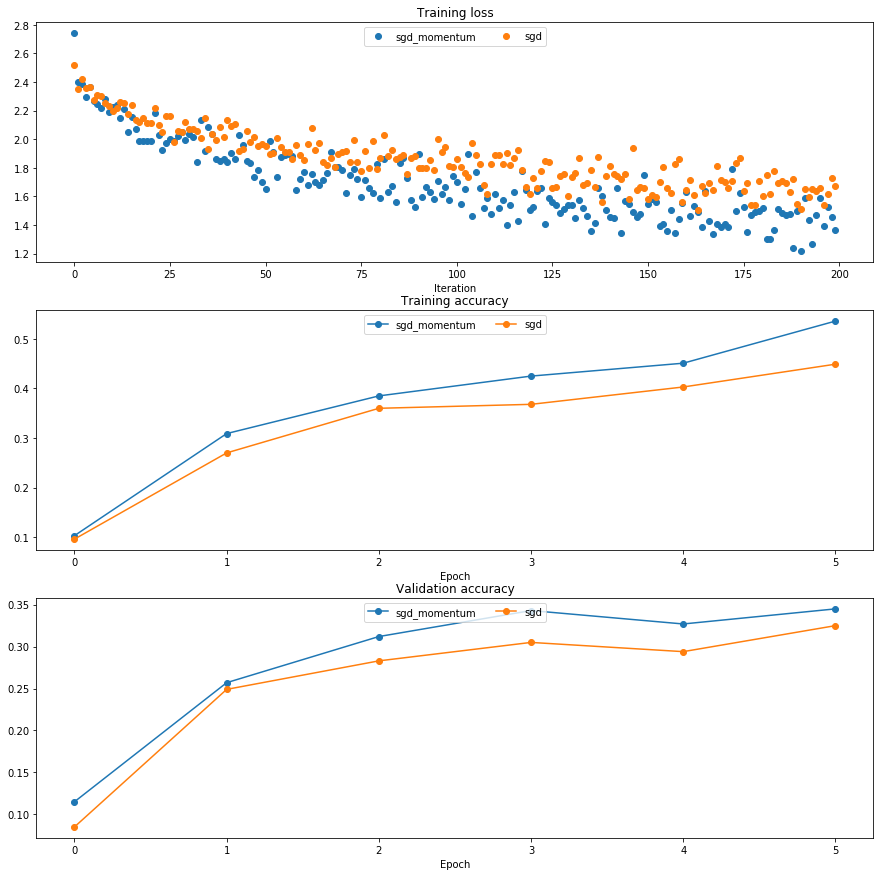

In [17]:
num_train = 4000
small_data = {
    'x_train': data['x_train'][:num_train], 
    'y_train': data['y_train'][:num_train], 
    'x_val': data['x_val'], 
    'y_val': data['y_val']
}

solvers = {}

for update_rule in ['sgd','sgd_momentum']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale = 5e-2)
    solver = Solver(model, small_data, num_epochs = 5, batch_size = 100, update_rule = update_rule, 
                   optim_config = {'learning_rate': 1e-2}, verbose = True)
    solvers[update_rule] = solver
    solver.train()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label = update_rule)
    
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label = update_rule)
    
    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label = update_rule)

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc = 'upper center', ncol = 4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp and Adam

In [18]:
# Test RMSProp implementation; you should see errors less than 1e-7.
from cs231n.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
    [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
    [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
    [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
    [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
    [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
    [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
    [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
    [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('cache error: ', rel_error(expected_cache, config['cache']))

next_w error:  9.52468751104e-08
cache error:  2.64779558072e-09


In [9]:
%%time
# Test Adam implementation; you should see errors around 1e-7 or less

from cs231n.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
    [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
    [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
    [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
    [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
    [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
    [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
    [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
    [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
    [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
    [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
    [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
    [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

next_w error:  1.13956917985e-07
v error:  4.20831403811e-09
m error:  4.21496319311e-09
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 927 µs


running with  adam
(Iteration 1 / 200) loss: 2.624385
(Epoch 0 /5) train acc: 0.148000; val_acc: 0.125000
(Iteration 11 / 200) loss: 2.054483
(Iteration 21 / 200) loss: 1.940713
(Iteration 31 / 200) loss: 1.968751
(Epoch 1 /5) train acc: 0.371000; val_acc: 0.332000
(Iteration 41 / 200) loss: 1.776015
(Iteration 51 / 200) loss: 1.725977
(Iteration 61 / 200) loss: 1.683298
(Iteration 71 / 200) loss: 1.593657
(Epoch 2 /5) train acc: 0.442000; val_acc: 0.335000
(Iteration 81 / 200) loss: 1.770899
(Iteration 91 / 200) loss: 1.612900
(Iteration 101 / 200) loss: 1.363499
(Iteration 111 / 200) loss: 1.533342
(Epoch 3 /5) train acc: 0.498000; val_acc: 0.359000
(Iteration 121 / 200) loss: 1.471745
(Iteration 131 / 200) loss: 1.374103
(Iteration 141 / 200) loss: 1.353953
(Iteration 151 / 200) loss: 1.196682
(Epoch 4 /5) train acc: 0.536000; val_acc: 0.360000
(Iteration 161 / 200) loss: 1.234698
(Iteration 171 / 200) loss: 1.260429
(Iteration 181 / 200) loss: 1.169784
(Iteration 191 / 200) loss: 1

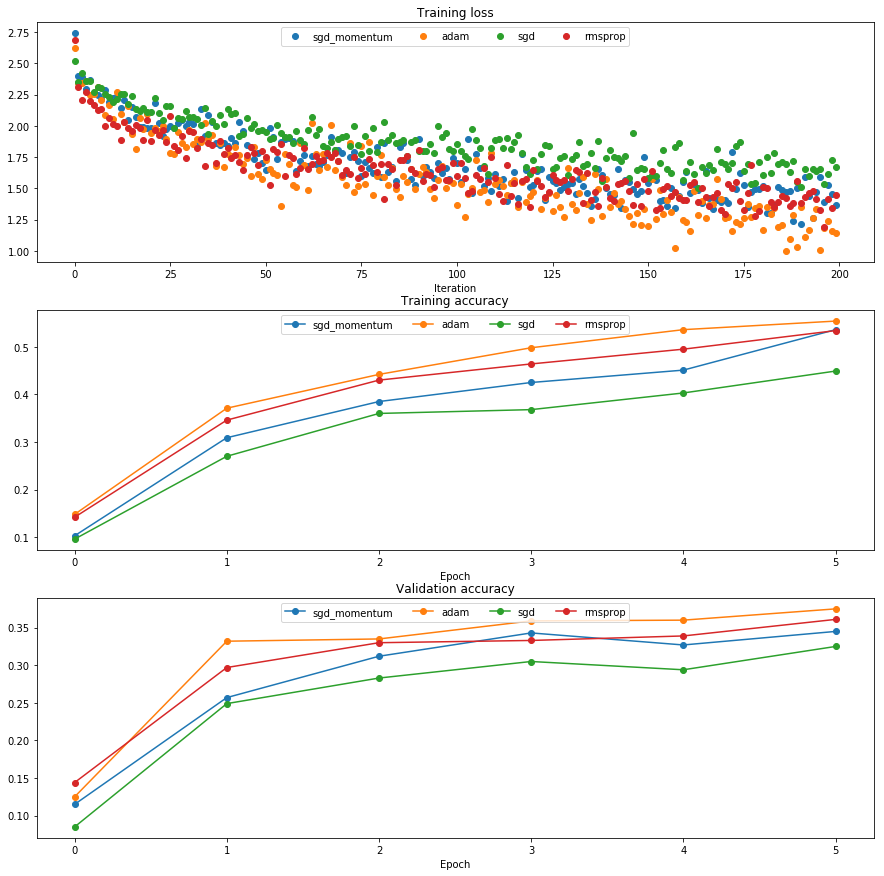

In [20]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale = 5e-2)
    solver = Solver(model, small_data, num_epochs = 5, batch_size = 100, update_rule = update_rule, 
                   optim_config = {'learning_rate': learning_rates[update_rule]}, verbose = True)
    solvers[update_rule] = solver
    solver.train()
    
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label = update_rule)
    
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label = update_rule)
    
    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label = update_rule)

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc = 'upper center', ncol = 4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# Train a good model!

In [10]:
%%time
num_train = 10000
small_data = {
    'x_train': data['x_train'][:num_train], 
    'y_train': data['y_train'][:num_train], 
    'x_val': data['x_val'], 
    'y_val': data['y_val']
}

best_model = None
best_val_acc = 0.0
results = {}

learning_rates = 10 ** np.arange(-6.0, -1.0, 0.3)
weight_scales = 10 ** np.arange(-5.0, -1.0, 0.2)
regs = 10 ** np.arange(-4.0, -1.0, 0.3)

for weight_scale in weight_scales:
    for learning_rate in learning_rates:
        for reg in regs:
            print('Training net with weight_scale = %.6f, learning_rate = %.8f, reg strength = %.5f' % 
                  (weight_scale, learning_rate, reg))
            model = FullyConnectedNet([200, 500, 200, 100], weight_scale = weight_scale, 
                                      use_batchnorm = False, reg = reg)
            solver = Solver(model, small_data, print_every = 100, num_epochs = 10, batch_size = 128, 
                            update_rule = 'adam', optim_config = {'learning_rate': learning_rate}, 
                            lr_decay = 0.95, verbose = False)
            solver.train()
            
            train_acc = solver.train_acc_history[-1]
            val_acc = solver.val_acc_history[-1]
            results[(weight_scale, learning_rate, reg)] = (train_acc, val_acc)
            print('train acc: %.4f; validation acc: %.4f' % (train_acc, val_acc))
            
            if val_acc > best_val_acc:
                best_model = model
                best_val_acc = val_acc

Training net with weight_scale = 0.000010, learning_rate = 0.00000100, reg strength = 0.00010
train acc: 0.0910; validation acc: 0.1020
Training net with weight_scale = 0.000010, learning_rate = 0.00000100, reg strength = 0.00020
train acc: 0.0990; validation acc: 0.1020
Training net with weight_scale = 0.000010, learning_rate = 0.00000100, reg strength = 0.00040
train acc: 0.1050; validation acc: 0.0790
Training net with weight_scale = 0.000010, learning_rate = 0.00000100, reg strength = 0.00079
train acc: 0.1050; validation acc: 0.1130
Training net with weight_scale = 0.000010, learning_rate = 0.00000100, reg strength = 0.00158
train acc: 0.1170; validation acc: 0.1130
Training net with weight_scale = 0.000010, learning_rate = 0.00000100, reg strength = 0.00316
train acc: 0.0910; validation acc: 0.1130
Training net with weight_scale = 0.000010, learning_rate = 0.00000100, reg strength = 0.00631
train acc: 0.0920; validation acc: 0.1020
Training net with weight_scale = 0.000010, learn

train acc: 0.1060; validation acc: 0.1120
Training net with weight_scale = 0.000010, learning_rate = 0.00006310, reg strength = 0.00020
train acc: 0.0930; validation acc: 0.1020
Training net with weight_scale = 0.000010, learning_rate = 0.00006310, reg strength = 0.00040
train acc: 0.1000; validation acc: 0.1020
Training net with weight_scale = 0.000010, learning_rate = 0.00006310, reg strength = 0.00079
train acc: 0.1110; validation acc: 0.0790
Training net with weight_scale = 0.000010, learning_rate = 0.00006310, reg strength = 0.00158
train acc: 0.0920; validation acc: 0.1130
Training net with weight_scale = 0.000010, learning_rate = 0.00006310, reg strength = 0.00316
train acc: 0.0890; validation acc: 0.0780
Training net with weight_scale = 0.000010, learning_rate = 0.00006310, reg strength = 0.00631
train acc: 0.0910; validation acc: 0.1130
Training net with weight_scale = 0.000010, learning_rate = 0.00006310, reg strength = 0.01259
train acc: 0.0950; validation acc: 0.0790
Traini

train acc: 0.4940; validation acc: 0.4120
Training net with weight_scale = 0.000010, learning_rate = 0.00398107, reg strength = 0.00040
train acc: 0.3930; validation acc: 0.3350
Training net with weight_scale = 0.000010, learning_rate = 0.00398107, reg strength = 0.00079
train acc: 0.4900; validation acc: 0.4100
Training net with weight_scale = 0.000010, learning_rate = 0.00398107, reg strength = 0.00158
train acc: 0.4010; validation acc: 0.4020
Training net with weight_scale = 0.000010, learning_rate = 0.00398107, reg strength = 0.00316
train acc: 0.3590; validation acc: 0.3740
Training net with weight_scale = 0.000010, learning_rate = 0.00398107, reg strength = 0.00631
train acc: 0.3960; validation acc: 0.3730
Training net with weight_scale = 0.000010, learning_rate = 0.00398107, reg strength = 0.01259
train acc: 0.1110; validation acc: 0.0790
Training net with weight_scale = 0.000010, learning_rate = 0.00398107, reg strength = 0.02512
train acc: 0.0950; validation acc: 0.1130
Traini

/home/carsmart/Ubuntu/CS231n_2016/assignment2/cs231n/layers.py:319: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


train acc: 0.0860; validation acc: 0.0790
Training net with weight_scale = 0.000010, learning_rate = 0.00794328, reg strength = 0.00316
train acc: 0.2090; validation acc: 0.2020
Training net with weight_scale = 0.000010, learning_rate = 0.00794328, reg strength = 0.00631
train acc: 0.2020; validation acc: 0.2070
Training net with weight_scale = 0.000010, learning_rate = 0.00794328, reg strength = 0.01259
train acc: 0.1860; validation acc: 0.1950
Training net with weight_scale = 0.000010, learning_rate = 0.00794328, reg strength = 0.02512
train acc: 0.1920; validation acc: 0.2120
Training net with weight_scale = 0.000010, learning_rate = 0.00794328, reg strength = 0.05012
train acc: 0.2010; validation acc: 0.1850
Training net with weight_scale = 0.000010, learning_rate = 0.01584893, reg strength = 0.00010
train acc: 0.1050; validation acc: 0.0780
Training net with weight_scale = 0.000010, learning_rate = 0.01584893, reg strength = 0.00020
train acc: 0.1000; validation acc: 0.0870
Traini

train acc: 0.1070; validation acc: 0.1130
Training net with weight_scale = 0.000016, learning_rate = 0.00000398, reg strength = 0.00631
train acc: 0.1030; validation acc: 0.1020
Training net with weight_scale = 0.000016, learning_rate = 0.00000398, reg strength = 0.01259
train acc: 0.1060; validation acc: 0.0790
Training net with weight_scale = 0.000016, learning_rate = 0.00000398, reg strength = 0.02512
train acc: 0.1120; validation acc: 0.0790
Training net with weight_scale = 0.000016, learning_rate = 0.00000398, reg strength = 0.05012
train acc: 0.1080; validation acc: 0.1020
Training net with weight_scale = 0.000016, learning_rate = 0.00000794, reg strength = 0.00010
train acc: 0.1180; validation acc: 0.0790
Training net with weight_scale = 0.000016, learning_rate = 0.00000794, reg strength = 0.00020
train acc: 0.1050; validation acc: 0.1130
Training net with weight_scale = 0.000016, learning_rate = 0.00000794, reg strength = 0.00040
train acc: 0.0960; validation acc: 0.0790
Traini

train acc: 0.0900; validation acc: 0.1020
Training net with weight_scale = 0.000016, learning_rate = 0.00025119, reg strength = 0.01259
train acc: 0.0800; validation acc: 0.1020
Training net with weight_scale = 0.000016, learning_rate = 0.00025119, reg strength = 0.02512
train acc: 0.0960; validation acc: 0.1020
Training net with weight_scale = 0.000016, learning_rate = 0.00025119, reg strength = 0.05012
train acc: 0.1060; validation acc: 0.0790
Training net with weight_scale = 0.000016, learning_rate = 0.00050119, reg strength = 0.00010
train acc: 0.0940; validation acc: 0.1020
Training net with weight_scale = 0.000016, learning_rate = 0.00050119, reg strength = 0.00020
train acc: 0.0930; validation acc: 0.1130
Training net with weight_scale = 0.000016, learning_rate = 0.00050119, reg strength = 0.00040
train acc: 0.1020; validation acc: 0.0790
Training net with weight_scale = 0.000016, learning_rate = 0.00050119, reg strength = 0.00079
train acc: 0.1060; validation acc: 0.0790
Traini

train acc: 0.0980; validation acc: 0.1130
Training net with weight_scale = 0.000016, learning_rate = 0.01584893, reg strength = 0.02512
train acc: 0.1500; validation acc: 0.1650
Training net with weight_scale = 0.000016, learning_rate = 0.01584893, reg strength = 0.05012
train acc: 0.1810; validation acc: 0.1850
Training net with weight_scale = 0.000016, learning_rate = 0.03162278, reg strength = 0.00010
train acc: 0.1130; validation acc: 0.1120
Training net with weight_scale = 0.000016, learning_rate = 0.03162278, reg strength = 0.00020
train acc: 0.0950; validation acc: 0.1120
Training net with weight_scale = 0.000016, learning_rate = 0.03162278, reg strength = 0.00040
train acc: 0.1060; validation acc: 0.0790
Training net with weight_scale = 0.000016, learning_rate = 0.03162278, reg strength = 0.00079
train acc: 0.1000; validation acc: 0.0790
Training net with weight_scale = 0.000016, learning_rate = 0.03162278, reg strength = 0.00158
train acc: 0.0950; validation acc: 0.1130
Traini

train acc: 0.1240; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.00000794, reg strength = 0.05012
train acc: 0.0980; validation acc: 0.1130
Training net with weight_scale = 0.000025, learning_rate = 0.00001585, reg strength = 0.00010
train acc: 0.0960; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.00001585, reg strength = 0.00020
train acc: 0.1010; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.00001585, reg strength = 0.00040
train acc: 0.1140; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.00001585, reg strength = 0.00079
train acc: 0.0920; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.00001585, reg strength = 0.00158
train acc: 0.1200; validation acc: 0.1130
Training net with weight_scale = 0.000025, learning_rate = 0.00001585, reg strength = 0.00316
train acc: 0.1130; validation acc: 0.1020
Traini

train acc: 0.1040; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.00100000, reg strength = 0.00010
train acc: 0.1040; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.00100000, reg strength = 0.00020
train acc: 0.1170; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.00100000, reg strength = 0.00040
train acc: 0.1080; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.00100000, reg strength = 0.00079
train acc: 0.1270; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.00100000, reg strength = 0.00158
train acc: 0.0960; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.00100000, reg strength = 0.00316
train acc: 0.1040; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.00100000, reg strength = 0.00631
train acc: 0.0960; validation acc: 0.0790
Traini

train acc: 0.1000; validation acc: 0.1120
Training net with weight_scale = 0.000025, learning_rate = 0.06309573, reg strength = 0.00020
train acc: 0.1010; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.06309573, reg strength = 0.00040
train acc: 0.1030; validation acc: 0.1020
Training net with weight_scale = 0.000025, learning_rate = 0.06309573, reg strength = 0.00079
train acc: 0.1070; validation acc: 0.1070
Training net with weight_scale = 0.000025, learning_rate = 0.06309573, reg strength = 0.00158
train acc: 0.1050; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.06309573, reg strength = 0.00316
train acc: 0.1000; validation acc: 0.0790
Training net with weight_scale = 0.000025, learning_rate = 0.06309573, reg strength = 0.00631
train acc: 0.1030; validation acc: 0.1120
Training net with weight_scale = 0.000025, learning_rate = 0.06309573, reg strength = 0.01259
train acc: 0.0940; validation acc: 0.1070
Traini

train acc: 0.1100; validation acc: 0.0790
Training net with weight_scale = 0.000040, learning_rate = 0.00003162, reg strength = 0.00040
train acc: 0.1060; validation acc: 0.1130
Training net with weight_scale = 0.000040, learning_rate = 0.00003162, reg strength = 0.00079
train acc: 0.1250; validation acc: 0.0790
Training net with weight_scale = 0.000040, learning_rate = 0.00003162, reg strength = 0.00158
train acc: 0.1000; validation acc: 0.1130
Training net with weight_scale = 0.000040, learning_rate = 0.00003162, reg strength = 0.00316
train acc: 0.1080; validation acc: 0.0790
Training net with weight_scale = 0.000040, learning_rate = 0.00003162, reg strength = 0.00631
train acc: 0.0980; validation acc: 0.0790
Training net with weight_scale = 0.000040, learning_rate = 0.00003162, reg strength = 0.01259
train acc: 0.1130; validation acc: 0.1020
Training net with weight_scale = 0.000040, learning_rate = 0.00003162, reg strength = 0.02512
train acc: 0.0950; validation acc: 0.1020
Traini

train acc: 0.5660; validation acc: 0.4140
Training net with weight_scale = 0.000040, learning_rate = 0.00199526, reg strength = 0.00079
train acc: 0.1030; validation acc: 0.1120
Training net with weight_scale = 0.000040, learning_rate = 0.00199526, reg strength = 0.00158
train acc: 0.5010; validation acc: 0.4200
Training net with weight_scale = 0.000040, learning_rate = 0.00199526, reg strength = 0.00316
train acc: 0.1080; validation acc: 0.0790
Training net with weight_scale = 0.000040, learning_rate = 0.00199526, reg strength = 0.00631
train acc: 0.1100; validation acc: 0.1130
Training net with weight_scale = 0.000040, learning_rate = 0.00199526, reg strength = 0.01259
train acc: 0.0950; validation acc: 0.0790
Training net with weight_scale = 0.000040, learning_rate = 0.00199526, reg strength = 0.02512
train acc: 0.0980; validation acc: 0.0790
Training net with weight_scale = 0.000040, learning_rate = 0.00199526, reg strength = 0.05012
train acc: 0.1000; validation acc: 0.1020
Traini

train acc: 0.1020; validation acc: 0.1130
Training net with weight_scale = 0.000063, learning_rate = 0.00000100, reg strength = 0.00158
train acc: 0.0940; validation acc: 0.1020
Training net with weight_scale = 0.000063, learning_rate = 0.00000100, reg strength = 0.00316
train acc: 0.0910; validation acc: 0.1020
Training net with weight_scale = 0.000063, learning_rate = 0.00000100, reg strength = 0.00631
train acc: 0.1100; validation acc: 0.1020
Training net with weight_scale = 0.000063, learning_rate = 0.00000100, reg strength = 0.01259
train acc: 0.1020; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00000100, reg strength = 0.02512
train acc: 0.1030; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00000100, reg strength = 0.05012
train acc: 0.1050; validation acc: 0.1130
Training net with weight_scale = 0.000063, learning_rate = 0.00000200, reg strength = 0.00010
train acc: 0.0940; validation acc: 0.1020
Traini

train acc: 0.0790; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00006310, reg strength = 0.00316
train acc: 0.1150; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00006310, reg strength = 0.00631
train acc: 0.1130; validation acc: 0.1020
Training net with weight_scale = 0.000063, learning_rate = 0.00006310, reg strength = 0.01259
train acc: 0.1230; validation acc: 0.1020
Training net with weight_scale = 0.000063, learning_rate = 0.00006310, reg strength = 0.02512
train acc: 0.0930; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00006310, reg strength = 0.05012
train acc: 0.1190; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00012589, reg strength = 0.00010
train acc: 0.0950; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00012589, reg strength = 0.00020
train acc: 0.1160; validation acc: 0.1020
Traini

train acc: 0.3980; validation acc: 0.3400
Training net with weight_scale = 0.000063, learning_rate = 0.00398107, reg strength = 0.00631
train acc: 0.3770; validation acc: 0.3610
Training net with weight_scale = 0.000063, learning_rate = 0.00398107, reg strength = 0.01259
train acc: 0.1320; validation acc: 0.0790
Training net with weight_scale = 0.000063, learning_rate = 0.00398107, reg strength = 0.02512
train acc: 0.1200; validation acc: 0.0780
Training net with weight_scale = 0.000063, learning_rate = 0.00398107, reg strength = 0.05012
train acc: 0.1120; validation acc: 0.1120
Training net with weight_scale = 0.000063, learning_rate = 0.00794328, reg strength = 0.00010
train acc: 0.2990; validation acc: 0.2760
Training net with weight_scale = 0.000063, learning_rate = 0.00794328, reg strength = 0.00020
train acc: 0.3300; validation acc: 0.3040
Training net with weight_scale = 0.000063, learning_rate = 0.00794328, reg strength = 0.00040
train acc: 0.3250; validation acc: 0.2890
Traini

train acc: 0.0990; validation acc: 0.1130
Training net with weight_scale = 0.000100, learning_rate = 0.00000200, reg strength = 0.01259
train acc: 0.1000; validation acc: 0.0790
Training net with weight_scale = 0.000100, learning_rate = 0.00000200, reg strength = 0.02512
train acc: 0.0990; validation acc: 0.0790
Training net with weight_scale = 0.000100, learning_rate = 0.00000200, reg strength = 0.05012
train acc: 0.0880; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.00000398, reg strength = 0.00010
train acc: 0.1010; validation acc: 0.0790
Training net with weight_scale = 0.000100, learning_rate = 0.00000398, reg strength = 0.00020
train acc: 0.0880; validation acc: 0.0790
Training net with weight_scale = 0.000100, learning_rate = 0.00000398, reg strength = 0.00040
train acc: 0.1040; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.00000398, reg strength = 0.00079
train acc: 0.0930; validation acc: 0.1020
Traini

train acc: 0.0950; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.00012589, reg strength = 0.02512
train acc: 0.1040; validation acc: 0.1130
Training net with weight_scale = 0.000100, learning_rate = 0.00012589, reg strength = 0.05012
train acc: 0.0990; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.00025119, reg strength = 0.00010
train acc: 0.1080; validation acc: 0.1130
Training net with weight_scale = 0.000100, learning_rate = 0.00025119, reg strength = 0.00020
train acc: 0.0880; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.00025119, reg strength = 0.00040
train acc: 0.0960; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.00025119, reg strength = 0.00079
train acc: 0.0980; validation acc: 0.1130
Training net with weight_scale = 0.000100, learning_rate = 0.00025119, reg strength = 0.00158
train acc: 0.0910; validation acc: 0.0790
Traini

train acc: 0.1830; validation acc: 0.1770
Training net with weight_scale = 0.000100, learning_rate = 0.00794328, reg strength = 0.05012
train acc: 0.2220; validation acc: 0.2290
Training net with weight_scale = 0.000100, learning_rate = 0.01584893, reg strength = 0.00010
train acc: 0.1000; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.01584893, reg strength = 0.00020
train acc: 0.1010; validation acc: 0.0790
Training net with weight_scale = 0.000100, learning_rate = 0.01584893, reg strength = 0.00040
train acc: 0.1040; validation acc: 0.0790
Training net with weight_scale = 0.000100, learning_rate = 0.01584893, reg strength = 0.00079
train acc: 0.1040; validation acc: 0.0790
Training net with weight_scale = 0.000100, learning_rate = 0.01584893, reg strength = 0.00158
train acc: 0.1040; validation acc: 0.1020
Training net with weight_scale = 0.000100, learning_rate = 0.01584893, reg strength = 0.00316
train acc: 0.0890; validation acc: 0.0780
Traini

train acc: 0.1250; validation acc: 0.1020
Training net with weight_scale = 0.000158, learning_rate = 0.00000794, reg strength = 0.00010
train acc: 0.1020; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00000794, reg strength = 0.00020
train acc: 0.0860; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00000794, reg strength = 0.00040
train acc: 0.1170; validation acc: 0.1020
Training net with weight_scale = 0.000158, learning_rate = 0.00000794, reg strength = 0.00079
train acc: 0.1050; validation acc: 0.1130
Training net with weight_scale = 0.000158, learning_rate = 0.00000794, reg strength = 0.00158
train acc: 0.0950; validation acc: 0.1020
Training net with weight_scale = 0.000158, learning_rate = 0.00000794, reg strength = 0.00316
train acc: 0.0900; validation acc: 0.1130
Training net with weight_scale = 0.000158, learning_rate = 0.00000794, reg strength = 0.00631
train acc: 0.1110; validation acc: 0.1020
Traini

train acc: 0.0810; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00050119, reg strength = 0.00020
train acc: 0.1040; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00050119, reg strength = 0.00040
train acc: 0.0930; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00050119, reg strength = 0.00079
train acc: 0.1170; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00050119, reg strength = 0.00158
train acc: 0.1230; validation acc: 0.1020
Training net with weight_scale = 0.000158, learning_rate = 0.00050119, reg strength = 0.00316
train acc: 0.1020; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00050119, reg strength = 0.00631
train acc: 0.1070; validation acc: 0.0790
Training net with weight_scale = 0.000158, learning_rate = 0.00050119, reg strength = 0.01259
train acc: 0.0990; validation acc: 0.0790
Traini

train acc: 0.0850; validation acc: 0.1020
Training net with weight_scale = 0.000158, learning_rate = 0.03162278, reg strength = 0.00040
train acc: 0.1010; validation acc: 0.1020
Training net with weight_scale = 0.000158, learning_rate = 0.03162278, reg strength = 0.00079
train acc: 0.1050; validation acc: 0.1130
Training net with weight_scale = 0.000158, learning_rate = 0.03162278, reg strength = 0.00158
train acc: 0.0930; validation acc: 0.1070
Training net with weight_scale = 0.000158, learning_rate = 0.03162278, reg strength = 0.00316
train acc: 0.1090; validation acc: 0.1070
Training net with weight_scale = 0.000158, learning_rate = 0.03162278, reg strength = 0.00631
train acc: 0.1160; validation acc: 0.1130
Training net with weight_scale = 0.000158, learning_rate = 0.03162278, reg strength = 0.01259
train acc: 0.1070; validation acc: 0.0780
Training net with weight_scale = 0.000158, learning_rate = 0.03162278, reg strength = 0.02512
train acc: 0.1090; validation acc: 0.1020
Traini

train acc: 0.0910; validation acc: 0.1070
Training net with weight_scale = 0.000251, learning_rate = 0.00001585, reg strength = 0.00079
train acc: 0.1060; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00001585, reg strength = 0.00158
train acc: 0.1020; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00001585, reg strength = 0.00316
train acc: 0.1170; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00001585, reg strength = 0.00631
train acc: 0.0900; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00001585, reg strength = 0.01259
train acc: 0.0900; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00001585, reg strength = 0.02512
train acc: 0.1010; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00001585, reg strength = 0.05012
train acc: 0.1140; validation acc: 0.1020
Traini

train acc: 0.1080; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00100000, reg strength = 0.00158
train acc: 0.1100; validation acc: 0.1130
Training net with weight_scale = 0.000251, learning_rate = 0.00100000, reg strength = 0.00316
train acc: 0.1200; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00100000, reg strength = 0.00631
train acc: 0.1130; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00100000, reg strength = 0.01259
train acc: 0.0970; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00100000, reg strength = 0.02512
train acc: 0.0990; validation acc: 0.0790
Training net with weight_scale = 0.000251, learning_rate = 0.00100000, reg strength = 0.05012
train acc: 0.1050; validation acc: 0.1020
Training net with weight_scale = 0.000251, learning_rate = 0.00199526, reg strength = 0.00010
train acc: 0.5990; validation acc: 0.4220
Traini

train acc: 0.0990; validation acc: 0.0870
Training net with weight_scale = 0.000251, learning_rate = 0.06309573, reg strength = 0.00316
train acc: 0.1060; validation acc: 0.1070
Training net with weight_scale = 0.000251, learning_rate = 0.06309573, reg strength = 0.00631
train acc: 0.0950; validation acc: 0.0780
Training net with weight_scale = 0.000251, learning_rate = 0.06309573, reg strength = 0.01259
train acc: 0.1100; validation acc: 0.1020
Training net with weight_scale = 0.000251, learning_rate = 0.06309573, reg strength = 0.02512
train acc: 0.1100; validation acc: 0.0980
Training net with weight_scale = 0.000251, learning_rate = 0.06309573, reg strength = 0.05012
train acc: 0.1040; validation acc: 0.0790
Training net with weight_scale = 0.000398, learning_rate = 0.00000100, reg strength = 0.00010
train acc: 0.0890; validation acc: 0.0790
Training net with weight_scale = 0.000398, learning_rate = 0.00000100, reg strength = 0.00020
train acc: 0.0980; validation acc: 0.1130
Traini

train acc: 0.1080; validation acc: 0.0790
Training net with weight_scale = 0.000398, learning_rate = 0.00003162, reg strength = 0.00631
train acc: 0.1030; validation acc: 0.1020
Training net with weight_scale = 0.000398, learning_rate = 0.00003162, reg strength = 0.01259
train acc: 0.1030; validation acc: 0.1020
Training net with weight_scale = 0.000398, learning_rate = 0.00003162, reg strength = 0.02512
train acc: 0.0890; validation acc: 0.1130
Training net with weight_scale = 0.000398, learning_rate = 0.00003162, reg strength = 0.05012
train acc: 0.1170; validation acc: 0.1020
Training net with weight_scale = 0.000398, learning_rate = 0.00006310, reg strength = 0.00010
train acc: 0.1800; validation acc: 0.1810
Training net with weight_scale = 0.000398, learning_rate = 0.00006310, reg strength = 0.00020
train acc: 0.1090; validation acc: 0.0790
Training net with weight_scale = 0.000398, learning_rate = 0.00006310, reg strength = 0.00040
train acc: 0.1040; validation acc: 0.1130
Traini

train acc: 0.0850; validation acc: 0.1130
Training net with weight_scale = 0.000398, learning_rate = 0.00199526, reg strength = 0.01259
train acc: 0.0980; validation acc: 0.1130
Training net with weight_scale = 0.000398, learning_rate = 0.00199526, reg strength = 0.02512
train acc: 0.0820; validation acc: 0.1130
Training net with weight_scale = 0.000398, learning_rate = 0.00199526, reg strength = 0.05012
train acc: 0.0960; validation acc: 0.1020
Training net with weight_scale = 0.000398, learning_rate = 0.00398107, reg strength = 0.00010
train acc: 0.4760; validation acc: 0.3930
Training net with weight_scale = 0.000398, learning_rate = 0.00398107, reg strength = 0.00020
train acc: 0.4570; validation acc: 0.4010
Training net with weight_scale = 0.000398, learning_rate = 0.00398107, reg strength = 0.00040
train acc: 0.4810; validation acc: 0.4050
Training net with weight_scale = 0.000398, learning_rate = 0.00398107, reg strength = 0.00079
train acc: 0.4290; validation acc: 0.3660
Traini

train acc: 0.0970; validation acc: 0.1130
Training net with weight_scale = 0.000631, learning_rate = 0.00000100, reg strength = 0.02512
train acc: 0.0940; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00000100, reg strength = 0.05012
train acc: 0.0910; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00000200, reg strength = 0.00010
train acc: 0.1000; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00000200, reg strength = 0.00020
train acc: 0.1070; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00000200, reg strength = 0.00040
train acc: 0.0960; validation acc: 0.1020
Training net with weight_scale = 0.000631, learning_rate = 0.00000200, reg strength = 0.00079
train acc: 0.0960; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00000200, reg strength = 0.00158
train acc: 0.1110; validation acc: 0.1020
Traini

train acc: 0.1120; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00006310, reg strength = 0.05012
train acc: 0.1080; validation acc: 0.1130
Training net with weight_scale = 0.000631, learning_rate = 0.00012589, reg strength = 0.00010
train acc: 0.1810; validation acc: 0.2020
Training net with weight_scale = 0.000631, learning_rate = 0.00012589, reg strength = 0.00020
train acc: 0.1030; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00012589, reg strength = 0.00040
train acc: 0.1920; validation acc: 0.2000
Training net with weight_scale = 0.000631, learning_rate = 0.00012589, reg strength = 0.00079
train acc: 0.1090; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00012589, reg strength = 0.00158
train acc: 0.1080; validation acc: 0.0790
Training net with weight_scale = 0.000631, learning_rate = 0.00012589, reg strength = 0.00316
train acc: 0.1000; validation acc: 0.1020
Traini

train acc: 0.1100; validation acc: 0.1020
Training net with weight_scale = 0.000631, learning_rate = 0.00794328, reg strength = 0.00010
train acc: 0.3430; validation acc: 0.3360
Training net with weight_scale = 0.000631, learning_rate = 0.00794328, reg strength = 0.00020
train acc: 0.0890; validation acc: 0.1020
Training net with weight_scale = 0.000631, learning_rate = 0.00794328, reg strength = 0.00040
train acc: 0.3230; validation acc: 0.3210
Training net with weight_scale = 0.000631, learning_rate = 0.00794328, reg strength = 0.00079
train acc: 0.2630; validation acc: 0.2810
Training net with weight_scale = 0.000631, learning_rate = 0.00794328, reg strength = 0.00158
train acc: 0.2870; validation acc: 0.2900
Training net with weight_scale = 0.000631, learning_rate = 0.00794328, reg strength = 0.00316
train acc: 0.1950; validation acc: 0.1710
Training net with weight_scale = 0.000631, learning_rate = 0.00794328, reg strength = 0.00631
train acc: 0.2570; validation acc: 0.2370
Traini

train acc: 0.1970; validation acc: 0.1880
Training net with weight_scale = 0.001000, learning_rate = 0.00000398, reg strength = 0.00020
train acc: 0.1090; validation acc: 0.1120
Training net with weight_scale = 0.001000, learning_rate = 0.00000398, reg strength = 0.00040
train acc: 0.1010; validation acc: 0.1020
Training net with weight_scale = 0.001000, learning_rate = 0.00000398, reg strength = 0.00079
train acc: 0.1090; validation acc: 0.1020
Training net with weight_scale = 0.001000, learning_rate = 0.00000398, reg strength = 0.00158
train acc: 0.1120; validation acc: 0.1130
Training net with weight_scale = 0.001000, learning_rate = 0.00000398, reg strength = 0.00316
train acc: 0.1050; validation acc: 0.1020
Training net with weight_scale = 0.001000, learning_rate = 0.00000398, reg strength = 0.00631
train acc: 0.0990; validation acc: 0.0790
Training net with weight_scale = 0.001000, learning_rate = 0.00000398, reg strength = 0.01259
train acc: 0.0920; validation acc: 0.1020
Traini

train acc: 0.4610; validation acc: 0.3840
Training net with weight_scale = 0.001000, learning_rate = 0.00025119, reg strength = 0.00040
train acc: 0.1050; validation acc: 0.0790
Training net with weight_scale = 0.001000, learning_rate = 0.00025119, reg strength = 0.00079
train acc: 0.0850; validation acc: 0.0790
Training net with weight_scale = 0.001000, learning_rate = 0.00025119, reg strength = 0.00158
train acc: 0.0990; validation acc: 0.1120
Training net with weight_scale = 0.001000, learning_rate = 0.00025119, reg strength = 0.00316
train acc: 0.0930; validation acc: 0.1120
Training net with weight_scale = 0.001000, learning_rate = 0.00025119, reg strength = 0.00631
train acc: 0.0960; validation acc: 0.1130
Training net with weight_scale = 0.001000, learning_rate = 0.00025119, reg strength = 0.01259
train acc: 0.1020; validation acc: 0.1130
Training net with weight_scale = 0.001000, learning_rate = 0.00025119, reg strength = 0.02512
train acc: 0.1260; validation acc: 0.1020
Traini

train acc: 0.1050; validation acc: 0.1130
Training net with weight_scale = 0.001000, learning_rate = 0.01584893, reg strength = 0.00079
train acc: 0.1100; validation acc: 0.0780
Training net with weight_scale = 0.001000, learning_rate = 0.01584893, reg strength = 0.00158
train acc: 0.1030; validation acc: 0.1130
Training net with weight_scale = 0.001000, learning_rate = 0.01584893, reg strength = 0.00316
train acc: 0.0980; validation acc: 0.0790
Training net with weight_scale = 0.001000, learning_rate = 0.01584893, reg strength = 0.00631
train acc: 0.1160; validation acc: 0.1020
Training net with weight_scale = 0.001000, learning_rate = 0.01584893, reg strength = 0.01259
train acc: 0.1020; validation acc: 0.1120
Training net with weight_scale = 0.001000, learning_rate = 0.01584893, reg strength = 0.02512
train acc: 0.2090; validation acc: 0.2000
Training net with weight_scale = 0.001000, learning_rate = 0.01584893, reg strength = 0.05012
train acc: 0.1210; validation acc: 0.1020
Traini

train acc: 0.1110; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.00000794, reg strength = 0.00158
train acc: 0.0860; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.00000794, reg strength = 0.00316
train acc: 0.1060; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.00000794, reg strength = 0.00631
train acc: 0.1140; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.00000794, reg strength = 0.01259
train acc: 0.1110; validation acc: 0.0790
Training net with weight_scale = 0.001585, learning_rate = 0.00000794, reg strength = 0.02512
train acc: 0.1100; validation acc: 0.0790
Training net with weight_scale = 0.001585, learning_rate = 0.00000794, reg strength = 0.05012
train acc: 0.0920; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.00001585, reg strength = 0.00010
train acc: 0.2050; validation acc: 0.1890
Traini

train acc: 0.1880; validation acc: 0.1990
Training net with weight_scale = 0.001585, learning_rate = 0.00050119, reg strength = 0.00316
train acc: 0.0900; validation acc: 0.0790
Training net with weight_scale = 0.001585, learning_rate = 0.00050119, reg strength = 0.00631
train acc: 0.0920; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.00050119, reg strength = 0.01259
train acc: 0.1000; validation acc: 0.0790
Training net with weight_scale = 0.001585, learning_rate = 0.00050119, reg strength = 0.02512
train acc: 0.0950; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.00050119, reg strength = 0.05012
train acc: 0.1030; validation acc: 0.1130
Training net with weight_scale = 0.001585, learning_rate = 0.00100000, reg strength = 0.00010
train acc: 0.6430; validation acc: 0.4290
Training net with weight_scale = 0.001585, learning_rate = 0.00100000, reg strength = 0.00020
train acc: 0.5420; validation acc: 0.4270
Traini

train acc: 0.1150; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.03162278, reg strength = 0.00631
train acc: 0.1130; validation acc: 0.0790
Training net with weight_scale = 0.001585, learning_rate = 0.03162278, reg strength = 0.01259
train acc: 0.1010; validation acc: 0.1020
Training net with weight_scale = 0.001585, learning_rate = 0.03162278, reg strength = 0.02512
train acc: 0.0830; validation acc: 0.1120
Training net with weight_scale = 0.001585, learning_rate = 0.03162278, reg strength = 0.05012
train acc: 0.1110; validation acc: 0.0790
Training net with weight_scale = 0.001585, learning_rate = 0.06309573, reg strength = 0.00010
train acc: 0.1060; validation acc: 0.1190
Training net with weight_scale = 0.001585, learning_rate = 0.06309573, reg strength = 0.00020
train acc: 0.0890; validation acc: 0.1070
Training net with weight_scale = 0.001585, learning_rate = 0.06309573, reg strength = 0.00040
train acc: 0.1080; validation acc: 0.0780
Traini

train acc: 0.0880; validation acc: 0.0790
Training net with weight_scale = 0.002512, learning_rate = 0.00001585, reg strength = 0.01259
train acc: 0.0940; validation acc: 0.1020
Training net with weight_scale = 0.002512, learning_rate = 0.00001585, reg strength = 0.02512
train acc: 0.0960; validation acc: 0.1130
Training net with weight_scale = 0.002512, learning_rate = 0.00001585, reg strength = 0.05012
train acc: 0.1060; validation acc: 0.1020
Training net with weight_scale = 0.002512, learning_rate = 0.00003162, reg strength = 0.00010
train acc: 0.2590; validation acc: 0.2530
Training net with weight_scale = 0.002512, learning_rate = 0.00003162, reg strength = 0.00020
train acc: 0.2850; validation acc: 0.2390
Training net with weight_scale = 0.002512, learning_rate = 0.00003162, reg strength = 0.00040
train acc: 0.2540; validation acc: 0.2500
Training net with weight_scale = 0.002512, learning_rate = 0.00003162, reg strength = 0.00079
train acc: 0.2470; validation acc: 0.2430
Traini

train acc: 0.1060; validation acc: 0.0790
Training net with weight_scale = 0.002512, learning_rate = 0.00100000, reg strength = 0.02512
train acc: 0.1140; validation acc: 0.0790
Training net with weight_scale = 0.002512, learning_rate = 0.00100000, reg strength = 0.05012
train acc: 0.1070; validation acc: 0.0790
Training net with weight_scale = 0.002512, learning_rate = 0.00199526, reg strength = 0.00010
train acc: 0.6180; validation acc: 0.4410
Training net with weight_scale = 0.002512, learning_rate = 0.00199526, reg strength = 0.00020
train acc: 0.5830; validation acc: 0.4370
Training net with weight_scale = 0.002512, learning_rate = 0.00199526, reg strength = 0.00040
train acc: 0.5700; validation acc: 0.4330
Training net with weight_scale = 0.002512, learning_rate = 0.00199526, reg strength = 0.00079
train acc: 0.5440; validation acc: 0.4220
Training net with weight_scale = 0.002512, learning_rate = 0.00199526, reg strength = 0.00158
train acc: 0.5280; validation acc: 0.4160
Traini

train acc: 0.0970; validation acc: 0.0870
Training net with weight_scale = 0.002512, learning_rate = 0.06309573, reg strength = 0.05012
train acc: 0.0900; validation acc: 0.1120
Training net with weight_scale = 0.003981, learning_rate = 0.00000100, reg strength = 0.00010
train acc: 0.1550; validation acc: 0.1580
Training net with weight_scale = 0.003981, learning_rate = 0.00000100, reg strength = 0.00020
train acc: 0.1490; validation acc: 0.1580
Training net with weight_scale = 0.003981, learning_rate = 0.00000100, reg strength = 0.00040
train acc: 0.1960; validation acc: 0.1910
Training net with weight_scale = 0.003981, learning_rate = 0.00000100, reg strength = 0.00079
train acc: 0.1860; validation acc: 0.1680
Training net with weight_scale = 0.003981, learning_rate = 0.00000100, reg strength = 0.00158
train acc: 0.1890; validation acc: 0.1790
Training net with weight_scale = 0.003981, learning_rate = 0.00000100, reg strength = 0.00316
train acc: 0.1860; validation acc: 0.1780
Traini

train acc: 0.0970; validation acc: 0.1020
Training net with weight_scale = 0.003981, learning_rate = 0.00006310, reg strength = 0.00010
train acc: 0.3750; validation acc: 0.3590
Training net with weight_scale = 0.003981, learning_rate = 0.00006310, reg strength = 0.00020
train acc: 0.3830; validation acc: 0.3390
Training net with weight_scale = 0.003981, learning_rate = 0.00006310, reg strength = 0.00040
train acc: 0.3590; validation acc: 0.3080
Training net with weight_scale = 0.003981, learning_rate = 0.00006310, reg strength = 0.00079
train acc: 0.3690; validation acc: 0.3480
Training net with weight_scale = 0.003981, learning_rate = 0.00006310, reg strength = 0.00158
train acc: 0.3480; validation acc: 0.3300
Training net with weight_scale = 0.003981, learning_rate = 0.00006310, reg strength = 0.00316
train acc: 0.3190; validation acc: 0.3070
Training net with weight_scale = 0.003981, learning_rate = 0.00006310, reg strength = 0.00631
train acc: 0.2750; validation acc: 0.2830
Traini

train acc: 0.4990; validation acc: 0.4210
Training net with weight_scale = 0.003981, learning_rate = 0.00398107, reg strength = 0.00020
train acc: 0.4960; validation acc: 0.3800
Training net with weight_scale = 0.003981, learning_rate = 0.00398107, reg strength = 0.00040
train acc: 0.3310; validation acc: 0.3200
Training net with weight_scale = 0.003981, learning_rate = 0.00398107, reg strength = 0.00079
train acc: 0.4590; validation acc: 0.4020
Training net with weight_scale = 0.003981, learning_rate = 0.00398107, reg strength = 0.00158
train acc: 0.4650; validation acc: 0.3640
Training net with weight_scale = 0.003981, learning_rate = 0.00398107, reg strength = 0.00316
train acc: 0.3960; validation acc: 0.3550
Training net with weight_scale = 0.003981, learning_rate = 0.00398107, reg strength = 0.00631
train acc: 0.3550; validation acc: 0.3550
Training net with weight_scale = 0.003981, learning_rate = 0.00398107, reg strength = 0.01259
train acc: 0.3430; validation acc: 0.3290
Traini

train acc: 0.2010; validation acc: 0.2020
Training net with weight_scale = 0.006310, learning_rate = 0.00000200, reg strength = 0.00040
train acc: 0.1630; validation acc: 0.1550
Training net with weight_scale = 0.006310, learning_rate = 0.00000200, reg strength = 0.00079
train acc: 0.1770; validation acc: 0.1620
Training net with weight_scale = 0.006310, learning_rate = 0.00000200, reg strength = 0.00158
train acc: 0.1980; validation acc: 0.1700
Training net with weight_scale = 0.006310, learning_rate = 0.00000200, reg strength = 0.00316
train acc: 0.1530; validation acc: 0.1470
Training net with weight_scale = 0.006310, learning_rate = 0.00000200, reg strength = 0.00631
train acc: 0.1520; validation acc: 0.1550
Training net with weight_scale = 0.006310, learning_rate = 0.00000200, reg strength = 0.01259
train acc: 0.1490; validation acc: 0.1510
Training net with weight_scale = 0.006310, learning_rate = 0.00000200, reg strength = 0.02512
train acc: 0.1550; validation acc: 0.1650
Traini

train acc: 0.5310; validation acc: 0.4240
Training net with weight_scale = 0.006310, learning_rate = 0.00012589, reg strength = 0.00079
train acc: 0.5690; validation acc: 0.4400
Training net with weight_scale = 0.006310, learning_rate = 0.00012589, reg strength = 0.00158
train acc: 0.5250; validation acc: 0.4270
Training net with weight_scale = 0.006310, learning_rate = 0.00012589, reg strength = 0.00316
train acc: 0.5080; validation acc: 0.4040
Training net with weight_scale = 0.006310, learning_rate = 0.00012589, reg strength = 0.00631
train acc: 0.5190; validation acc: 0.3950
Training net with weight_scale = 0.006310, learning_rate = 0.00012589, reg strength = 0.01259
train acc: 0.4560; validation acc: 0.3730
Training net with weight_scale = 0.006310, learning_rate = 0.00012589, reg strength = 0.02512
train acc: 0.2720; validation acc: 0.2610
Training net with weight_scale = 0.006310, learning_rate = 0.00012589, reg strength = 0.05012
train acc: 0.1070; validation acc: 0.1070
Traini

train acc: 0.3030; validation acc: 0.3130
Training net with weight_scale = 0.006310, learning_rate = 0.00794328, reg strength = 0.00158
train acc: 0.2040; validation acc: 0.2000
Training net with weight_scale = 0.006310, learning_rate = 0.00794328, reg strength = 0.00316
train acc: 0.2190; validation acc: 0.2300
Training net with weight_scale = 0.006310, learning_rate = 0.00794328, reg strength = 0.00631
train acc: 0.1020; validation acc: 0.1120
Training net with weight_scale = 0.006310, learning_rate = 0.00794328, reg strength = 0.01259
train acc: 0.0990; validation acc: 0.0920
Training net with weight_scale = 0.006310, learning_rate = 0.00794328, reg strength = 0.02512
train acc: 0.2010; validation acc: 0.1850
Training net with weight_scale = 0.006310, learning_rate = 0.00794328, reg strength = 0.05012
train acc: 0.1040; validation acc: 0.1020
Training net with weight_scale = 0.006310, learning_rate = 0.01584893, reg strength = 0.00010
train acc: 0.0910; validation acc: 0.0870
Traini

train acc: 0.2460; validation acc: 0.2560
Training net with weight_scale = 0.010000, learning_rate = 0.00000398, reg strength = 0.00316
train acc: 0.2490; validation acc: 0.2420
Training net with weight_scale = 0.010000, learning_rate = 0.00000398, reg strength = 0.00631
train acc: 0.2520; validation acc: 0.2580
Training net with weight_scale = 0.010000, learning_rate = 0.00000398, reg strength = 0.01259
train acc: 0.2360; validation acc: 0.2370
Training net with weight_scale = 0.010000, learning_rate = 0.00000398, reg strength = 0.02512
train acc: 0.2210; validation acc: 0.2050
Training net with weight_scale = 0.010000, learning_rate = 0.00000398, reg strength = 0.05012
train acc: 0.1370; validation acc: 0.1510
Training net with weight_scale = 0.010000, learning_rate = 0.00000794, reg strength = 0.00010
train acc: 0.3120; validation acc: 0.3240
Training net with weight_scale = 0.010000, learning_rate = 0.00000794, reg strength = 0.00020
train acc: 0.3290; validation acc: 0.3310
Traini

train acc: 0.6670; validation acc: 0.4590
Training net with weight_scale = 0.010000, learning_rate = 0.00025119, reg strength = 0.00631
train acc: 0.6490; validation acc: 0.4310
Training net with weight_scale = 0.010000, learning_rate = 0.00025119, reg strength = 0.01259
train acc: 0.6030; validation acc: 0.4540
Training net with weight_scale = 0.010000, learning_rate = 0.00025119, reg strength = 0.02512
train acc: 0.5240; validation acc: 0.4340
Training net with weight_scale = 0.010000, learning_rate = 0.00025119, reg strength = 0.05012
train acc: 0.3840; validation acc: 0.3520
Training net with weight_scale = 0.010000, learning_rate = 0.00050119, reg strength = 0.00010
train acc: 0.7350; validation acc: 0.4560
Training net with weight_scale = 0.010000, learning_rate = 0.00050119, reg strength = 0.00020
train acc: 0.7380; validation acc: 0.4450
Training net with weight_scale = 0.010000, learning_rate = 0.00050119, reg strength = 0.00040
train acc: 0.7370; validation acc: 0.4400
Traini

train acc: 0.0900; validation acc: 0.0790
Training net with weight_scale = 0.010000, learning_rate = 0.01584893, reg strength = 0.01259
train acc: 0.1210; validation acc: 0.1130
Training net with weight_scale = 0.010000, learning_rate = 0.01584893, reg strength = 0.02512
train acc: 0.1680; validation acc: 0.1480
Training net with weight_scale = 0.010000, learning_rate = 0.01584893, reg strength = 0.05012
train acc: 0.0980; validation acc: 0.1190
Training net with weight_scale = 0.010000, learning_rate = 0.03162278, reg strength = 0.00010
train acc: 0.1110; validation acc: 0.0870
Training net with weight_scale = 0.010000, learning_rate = 0.03162278, reg strength = 0.00020
train acc: 0.0730; validation acc: 0.1130
Training net with weight_scale = 0.010000, learning_rate = 0.03162278, reg strength = 0.00040
train acc: 0.0880; validation acc: 0.1050
Training net with weight_scale = 0.010000, learning_rate = 0.03162278, reg strength = 0.00079
train acc: 0.1240; validation acc: 0.1020
Traini

train acc: 0.3580; validation acc: 0.3550
Training net with weight_scale = 0.015849, learning_rate = 0.00000794, reg strength = 0.02512
train acc: 0.3280; validation acc: 0.3290
Training net with weight_scale = 0.015849, learning_rate = 0.00000794, reg strength = 0.05012
train acc: 0.3140; validation acc: 0.3190
Training net with weight_scale = 0.015849, learning_rate = 0.00001585, reg strength = 0.00010
train acc: 0.4230; validation acc: 0.4130
Training net with weight_scale = 0.015849, learning_rate = 0.00001585, reg strength = 0.00020
train acc: 0.4680; validation acc: 0.4150
Training net with weight_scale = 0.015849, learning_rate = 0.00001585, reg strength = 0.00040
train acc: 0.4550; validation acc: 0.4120
Training net with weight_scale = 0.015849, learning_rate = 0.00001585, reg strength = 0.00079
train acc: 0.4130; validation acc: 0.4070
Training net with weight_scale = 0.015849, learning_rate = 0.00001585, reg strength = 0.00158
train acc: 0.4530; validation acc: 0.4070
Traini

train acc: 0.5860; validation acc: 0.4510
Training net with weight_scale = 0.015849, learning_rate = 0.00050119, reg strength = 0.05012
train acc: 0.5140; validation acc: 0.4320
Training net with weight_scale = 0.015849, learning_rate = 0.00100000, reg strength = 0.00010
train acc: 0.7610; validation acc: 0.4350
Training net with weight_scale = 0.015849, learning_rate = 0.00100000, reg strength = 0.00020
train acc: 0.7850; validation acc: 0.4490
Training net with weight_scale = 0.015849, learning_rate = 0.00100000, reg strength = 0.00040
train acc: 0.7400; validation acc: 0.4580
Training net with weight_scale = 0.015849, learning_rate = 0.00100000, reg strength = 0.00079
train acc: 0.7410; validation acc: 0.4470
Training net with weight_scale = 0.015849, learning_rate = 0.00100000, reg strength = 0.00158
train acc: 0.7060; validation acc: 0.4470
Training net with weight_scale = 0.015849, learning_rate = 0.00100000, reg strength = 0.00316
train acc: 0.6500; validation acc: 0.4410
Traini

train acc: 0.1480; validation acc: 0.1530
Training net with weight_scale = 0.015849, learning_rate = 0.06309573, reg strength = 0.00010
train acc: 0.1010; validation acc: 0.1190
Training net with weight_scale = 0.015849, learning_rate = 0.06309573, reg strength = 0.00020
train acc: 0.1060; validation acc: 0.1120
Training net with weight_scale = 0.015849, learning_rate = 0.06309573, reg strength = 0.00040
train acc: 0.1020; validation acc: 0.0790
Training net with weight_scale = 0.015849, learning_rate = 0.06309573, reg strength = 0.00079
train acc: 0.1100; validation acc: 0.1130
Training net with weight_scale = 0.015849, learning_rate = 0.06309573, reg strength = 0.00158
train acc: 0.1150; validation acc: 0.0790
Training net with weight_scale = 0.015849, learning_rate = 0.06309573, reg strength = 0.00316
train acc: 0.0930; validation acc: 0.0790
Training net with weight_scale = 0.015849, learning_rate = 0.06309573, reg strength = 0.00631
train acc: 0.1140; validation acc: 0.0790
Traini

train acc: 0.5420; validation acc: 0.4370
Training net with weight_scale = 0.025119, learning_rate = 0.00003162, reg strength = 0.00020
train acc: 0.5450; validation acc: 0.4340
Training net with weight_scale = 0.025119, learning_rate = 0.00003162, reg strength = 0.00040
train acc: 0.5380; validation acc: 0.4110
Training net with weight_scale = 0.025119, learning_rate = 0.00003162, reg strength = 0.00079
train acc: 0.5260; validation acc: 0.4440
Training net with weight_scale = 0.025119, learning_rate = 0.00003162, reg strength = 0.00158
train acc: 0.5500; validation acc: 0.4390
Training net with weight_scale = 0.025119, learning_rate = 0.00003162, reg strength = 0.00316
train acc: 0.5520; validation acc: 0.4350
Training net with weight_scale = 0.025119, learning_rate = 0.00003162, reg strength = 0.00631
train acc: 0.5360; validation acc: 0.4220
Training net with weight_scale = 0.025119, learning_rate = 0.00003162, reg strength = 0.01259
train acc: 0.5640; validation acc: 0.4310
Traini

train acc: 0.6390; validation acc: 0.4570
Training net with weight_scale = 0.025119, learning_rate = 0.00199526, reg strength = 0.00040
train acc: 0.6500; validation acc: 0.4200
Training net with weight_scale = 0.025119, learning_rate = 0.00199526, reg strength = 0.00079
train acc: 0.6270; validation acc: 0.4510
Training net with weight_scale = 0.025119, learning_rate = 0.00199526, reg strength = 0.00158
train acc: 0.6030; validation acc: 0.4550
Training net with weight_scale = 0.025119, learning_rate = 0.00199526, reg strength = 0.00316
train acc: 0.5500; validation acc: 0.4100
Training net with weight_scale = 0.025119, learning_rate = 0.00199526, reg strength = 0.00631
train acc: 0.5060; validation acc: 0.4170
Training net with weight_scale = 0.025119, learning_rate = 0.00199526, reg strength = 0.01259
train acc: 0.4680; validation acc: 0.4090
Training net with weight_scale = 0.025119, learning_rate = 0.00199526, reg strength = 0.02512
train acc: 0.4250; validation acc: 0.3890
Traini

train acc: 0.1600; validation acc: 0.1820
Training net with weight_scale = 0.039811, learning_rate = 0.00000100, reg strength = 0.00079
train acc: 0.1450; validation acc: 0.1620
Training net with weight_scale = 0.039811, learning_rate = 0.00000100, reg strength = 0.00158
train acc: 0.1460; validation acc: 0.1390
Training net with weight_scale = 0.039811, learning_rate = 0.00000100, reg strength = 0.00316
train acc: 0.1320; validation acc: 0.1580
Training net with weight_scale = 0.039811, learning_rate = 0.00000100, reg strength = 0.00631
train acc: 0.1430; validation acc: 0.1260
Training net with weight_scale = 0.039811, learning_rate = 0.00000100, reg strength = 0.01259
train acc: 0.1510; validation acc: 0.1400
Training net with weight_scale = 0.039811, learning_rate = 0.00000100, reg strength = 0.02512
train acc: 0.1730; validation acc: 0.1600
Training net with weight_scale = 0.039811, learning_rate = 0.00000100, reg strength = 0.05012
train acc: 0.1760; validation acc: 0.1850
Traini

train acc: 0.7060; validation acc: 0.4070
Training net with weight_scale = 0.039811, learning_rate = 0.00006310, reg strength = 0.00158
train acc: 0.6880; validation acc: 0.3900
Training net with weight_scale = 0.039811, learning_rate = 0.00006310, reg strength = 0.00316
train acc: 0.6950; validation acc: 0.4020
Training net with weight_scale = 0.039811, learning_rate = 0.00006310, reg strength = 0.00631
train acc: 0.6900; validation acc: 0.3650
Training net with weight_scale = 0.039811, learning_rate = 0.00006310, reg strength = 0.01259
train acc: 0.7050; validation acc: 0.3610
Training net with weight_scale = 0.039811, learning_rate = 0.00006310, reg strength = 0.02512
train acc: 0.6810; validation acc: 0.3960
Training net with weight_scale = 0.039811, learning_rate = 0.00006310, reg strength = 0.05012
train acc: 0.6740; validation acc: 0.3960
Training net with weight_scale = 0.039811, learning_rate = 0.00012589, reg strength = 0.00010
train acc: 0.8350; validation acc: 0.3980
Traini

train acc: 0.1780; validation acc: 0.1830
Training net with weight_scale = 0.039811, learning_rate = 0.00398107, reg strength = 0.00316
train acc: 0.5130; validation acc: 0.4250
Training net with weight_scale = 0.039811, learning_rate = 0.00398107, reg strength = 0.00631
train acc: 0.4420; validation acc: 0.3970
Training net with weight_scale = 0.039811, learning_rate = 0.00398107, reg strength = 0.01259
train acc: 0.4400; validation acc: 0.3860
Training net with weight_scale = 0.039811, learning_rate = 0.00398107, reg strength = 0.02512
train acc: 0.3980; validation acc: 0.3760
Training net with weight_scale = 0.039811, learning_rate = 0.00398107, reg strength = 0.05012
train acc: 0.3890; validation acc: 0.3720
Training net with weight_scale = 0.039811, learning_rate = 0.00794328, reg strength = 0.00010
train acc: 0.3590; validation acc: 0.3600
Training net with weight_scale = 0.039811, learning_rate = 0.00794328, reg strength = 0.00020
train acc: 0.3880; validation acc: 0.3580
Traini

train acc: 0.1350; validation acc: 0.1520
Training net with weight_scale = 0.063096, learning_rate = 0.00000200, reg strength = 0.00631
train acc: 0.1620; validation acc: 0.1490
Training net with weight_scale = 0.063096, learning_rate = 0.00000200, reg strength = 0.01259
train acc: 0.1630; validation acc: 0.1480
Training net with weight_scale = 0.063096, learning_rate = 0.00000200, reg strength = 0.02512
train acc: 0.1450; validation acc: 0.1310
Training net with weight_scale = 0.063096, learning_rate = 0.00000200, reg strength = 0.05012
train acc: 0.1380; validation acc: 0.1730
Training net with weight_scale = 0.063096, learning_rate = 0.00000398, reg strength = 0.00010
train acc: 0.1960; validation acc: 0.1660
Training net with weight_scale = 0.063096, learning_rate = 0.00000398, reg strength = 0.00020
train acc: 0.1810; validation acc: 0.1600
Training net with weight_scale = 0.063096, learning_rate = 0.00000398, reg strength = 0.00040
train acc: 0.1580; validation acc: 0.1530
Traini

train acc: 0.6060; validation acc: 0.2840
Training net with weight_scale = 0.063096, learning_rate = 0.00012589, reg strength = 0.01259
train acc: 0.6810; validation acc: 0.2750
Training net with weight_scale = 0.063096, learning_rate = 0.00012589, reg strength = 0.02512
train acc: 0.7290; validation acc: 0.2820
Training net with weight_scale = 0.063096, learning_rate = 0.00012589, reg strength = 0.05012
train acc: 0.6840; validation acc: 0.2990
Training net with weight_scale = 0.063096, learning_rate = 0.00025119, reg strength = 0.00010
train acc: 0.8090; validation acc: 0.3200
Training net with weight_scale = 0.063096, learning_rate = 0.00025119, reg strength = 0.00020
train acc: 0.7300; validation acc: 0.3030
Training net with weight_scale = 0.063096, learning_rate = 0.00025119, reg strength = 0.00040
train acc: 0.6680; validation acc: 0.3050
Training net with weight_scale = 0.063096, learning_rate = 0.00025119, reg strength = 0.00079
train acc: 0.7230; validation acc: 0.3160
Traini

train acc: 0.4130; validation acc: 0.3700
Training net with weight_scale = 0.063096, learning_rate = 0.00794328, reg strength = 0.02512
train acc: 0.4340; validation acc: 0.3980
Training net with weight_scale = 0.063096, learning_rate = 0.00794328, reg strength = 0.05012
train acc: 0.3550; validation acc: 0.3520
Training net with weight_scale = 0.063096, learning_rate = 0.01584893, reg strength = 0.00010
train acc: 0.1530; validation acc: 0.1410
Training net with weight_scale = 0.063096, learning_rate = 0.01584893, reg strength = 0.00020
train acc: 0.1170; validation acc: 0.1070
Training net with weight_scale = 0.063096, learning_rate = 0.01584893, reg strength = 0.00040
train acc: 0.1120; validation acc: 0.1020
Training net with weight_scale = 0.063096, learning_rate = 0.01584893, reg strength = 0.00079
train acc: 0.1760; validation acc: 0.1660
Training net with weight_scale = 0.063096, learning_rate = 0.01584893, reg strength = 0.00158
train acc: 0.1120; validation acc: 0.1020
Traini

# Test your model!

In [24]:
(weight_scale, learning_rate, reg) = [k for k,v in results.items() if v==max(results.values())][0]

model = FullyConnectedNet([200, 500, 200, 100], weight_scale = weight_scale, 
                          use_batchnorm = False, reg = reg)
solver = Solver(model, data, print_every = 100, num_epochs = 20, batch_size = 128, 
                update_rule = 'adam', optim_config = {'learning_rate': learning_rate}, 
                lr_decay = 0.95, verbose = True)
solver.train()

(Iteration 1 / 7640) loss: 6.266659
(Epoch 0 /20) train acc: 0.108000; val_acc: 0.104000
(Iteration 101 / 7640) loss: 2.388497
(Iteration 201 / 7640) loss: 2.147487
(Iteration 301 / 7640) loss: 2.064972
(Epoch 1 /20) train acc: 0.463000; val_acc: 0.442000
(Iteration 401 / 7640) loss: 2.069074
(Iteration 501 / 7640) loss: 2.002079
(Iteration 601 / 7640) loss: 1.813023
(Iteration 701 / 7640) loss: 2.007200
(Epoch 2 /20) train acc: 0.517000; val_acc: 0.469000
(Iteration 801 / 7640) loss: 1.901695
(Iteration 901 / 7640) loss: 1.779602
(Iteration 1001 / 7640) loss: 1.904058
(Iteration 1101 / 7640) loss: 1.592409
(Epoch 3 /20) train acc: 0.549000; val_acc: 0.491000
(Iteration 1201 / 7640) loss: 1.789354
(Iteration 1301 / 7640) loss: 1.724363
(Iteration 1401 / 7640) loss: 1.586812
(Iteration 1501 / 7640) loss: 1.626051
(Epoch 4 /20) train acc: 0.615000; val_acc: 0.501000
(Iteration 1601 / 7640) loss: 1.530474
(Iteration 1701 / 7640) loss: 1.701170
(Iteration 1801 / 7640) loss: 1.466910
(Itera

In [28]:
x_val = data['x_val']
y_val = data['y_val']
x_test = data['x_test']
y_test = data['y_test']

y_test_pred = np.argmax(model.loss(x_test), axis=1)
y_val_pred = np.argmax(model.loss(x_val), axis=1)
print('Validation set accuracy: ', (y_val_pred == y_val).mean())
print('Test set accuracy: ', (y_test_pred == y_test).mean())

Validation set accuracy:  0.524
Test set accuracy:  0.525
